## Notebook 02

### **1. What is a Feedforward Neural Network?**

So far, we’ve learned about the **Perceptron** — a simple model that makes predictions based on a **single neuron**.

Now, we’re ready to explore something more powerful:

> **Feedforward Neural Networks (FNNs)**

A Feedforward Neural Network:
- **Stacks multiple neurons** into layers
- Allows intermediate **hidden layers**
- Uses **non-linear activation functions** to model complex patterns

### **Structure of a Basic FNN**

Let’s say our input is a vector $\mathbf{x} \in \mathbb{R}^2$  (e.g., two features from the heart dataset).

We define a simple **Feedforward Neural Network (FNN)** with:

- One **hidden layer** of 3 neurons  
- One **output neuron**


looks like this:

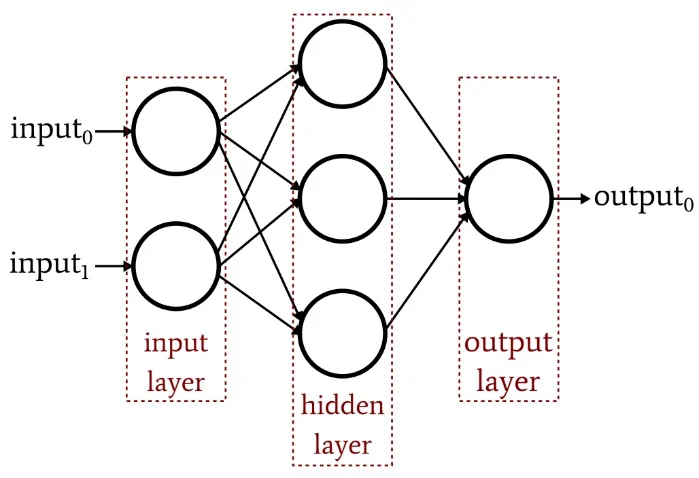


**What’s Happening Inside?**

Let’s walk through the **forward pass** step by step:

1. **Hidden layer linear transformation:**

$$
\mathbf{h}_{\text{lin}} = \mathbf{x} \cdot W_1 + \mathbf{b}_1
$$

2. **Apply activation (e.g., sigmoid or ReLU):**

$$
\mathbf{h} = \phi(\mathbf{h}_{\text{lin}})
$$

3. **Output layer:**

$$
\hat{y} = \mathbf{h} \cdot W_2 + b_2
$$


**Why Is This Powerful?**

- The hidden layer acts like a **feature transformer**.
- Non-linear activation (like ReLU or Sigmoid) allows the network to:
  - **Bend** the decision boundaries
  - **Capture non-linearly separable patterns**

---

### **2. Manual Forward Pass in NumPy**

To build our intuition, let’s **manually implement** a simple Feedforward Neural Network using **NumPy only** — no PyTorch yet!

We’ll use:

- A 2D input vector $\mathbf{x} = [x_1, x_2]$  
- A **hidden layer** with 3 neurons  
- An **output layer** with 1 neuron  
- An activation function (we’ll start with **ReLU**)

**FNN Architecture**

We define the network in two main steps:

#### **1. Hidden Layer**

- **Linear transformation**:

$$
\mathbf{h}_{\text{lin}} = \mathbf{x} W_1 + \mathbf{b}_1
$$

- **Apply activation** $\phi$ (ReLU or Sigmoid):

$$
\mathbf{h} = \phi(\mathbf{h}_{\text{lin}})
$$

#### **2. Output Layer**

- **Final prediction**:

$$
\hat{y} = \mathbf{h} W_2 + b_2
$$

### **Shape Intuition**

- $\mathbf{x} \in \mathbb{R}^{1 \times 2}$  ← (batch of 1, 2 features)  
- $W_1 \in \mathbb{R}^{2 \times 3}$  
- $\mathbf{h}_{\text{lin}} \in \mathbb{R}^{1 \times 3}$  
- $W_2 \in \mathbb{R}^{3 \times 1}$  
- $\hat{y} \in \mathbb{R}^{1 \times 1}$

In [24]:
import numpy as np

# Dimensions
input_dim = 2
hidden_dim = 3
output_dim = 1

# Input sample (batch of 1)
x = np.array([[1.5, -0.5]])  # shape (1, 2)

# Seed and weight initialization
np.random.seed(0)
W1 = np.random.randn(input_dim, hidden_dim)  # (2 → 3)
b1 = np.random.randn(1, hidden_dim)

W2 = np.random.randn(hidden_dim, output_dim)  # (3 → 1)
b2 = np.random.randn(1, output_dim)

# Activation function: ReLU
def relu(z):
    return np.maximum(0, z)

# Optional: You can try sigmoid too
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass
z1 = np.dot(x, W1) + b1      # Linear transform
h = relu(z1)                 # Apply activation
y_hat = np.dot(h, W2) + b2   # Output layer

print("Input:", x)
print("Hidden activations:", h)
print("Output prediction:", y_hat)

Input: [[ 1.5 -0.5]]
Hidden activations: [[2.47572034 0.         1.85352706]]
Output prediction: [[4.47310009]]


**Notes**

- We used **ReLU** as our activation here, which is common in modern networks  
- You can **experiment with Sigmoid** (already defined above) to observe different outputs  
- The weights `W1`, `b1`, etc. will be **reused** in the next section to visualize hidden transformations

---

### **3. Visualizing Hidden Layer Output**

Now that we’ve implemented a forward pass in NumPy, let’s open the hood and **see what’s happening inside the hidden layer**.

**Why Visualize Hidden Layers?**

Each neuron in the hidden layer applies a **linear transformation** followed by a **nonlinear activation**.  
This combination **reshapes the input space** so the output neuron can more easily separate classes.

**Let’s Ask:**
- Which regions of the input space activate a given neuron?
- How does each neuron "light up" different areas?
- Together, how do they chop the space into decision-friendly chunks?

**Visual Intuition**

Think of each hidden neuron like a **feature detector**:

- Neuron 1 may fire strongly in the top-left
- Neuron 2 may activate along a diagonal band
- Neuron 3 may respond to the bottom-right

Together, they build new **nonlinear representations** of the input space.

**Contour Plot of Hidden Activations (ReLU)**

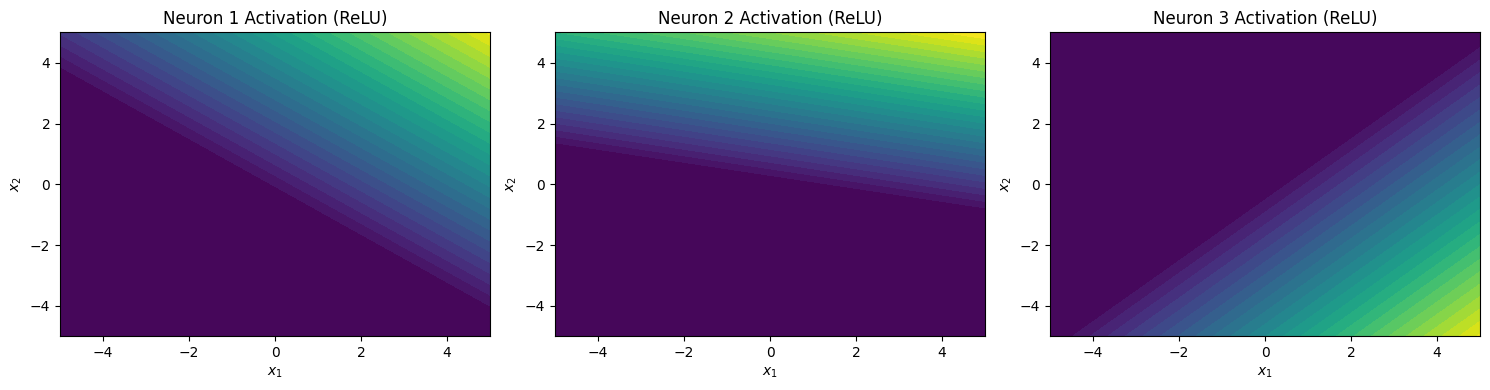

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Use same weights from Section 2 for consistency
# Assumes W1, b1 already defined from Section 2
# And relu() already defined

# Create a 2D grid of input values
grid_x1, grid_x2 = np.meshgrid(
    np.linspace(-5, 5, 200),
    np.linspace(-5, 5, 200)
)
grid_points = np.c_[grid_x1.ravel(), grid_x2.ravel()]  # shape (40000, 2)

# Forward pass through hidden layer
z1 = np.dot(grid_points, W1) + b1    # shape (40000, 3)
h1 = relu(z1)                        # shape (40000, 3)

# Try sigmoid activation instead:
# h1 = sigmoid(z1)                   # shape (40000, 3)

# Try without activation for linear output
# h1 = z1                        # shape (40000, 3)

# Plot activation map for each hidden neuron
fig, axes = plt.subplots(1, hidden_dim, figsize=(15, 4))
for i in range(hidden_dim):
    ax = axes[i]
    h_vals = h1[:, i].reshape(grid_x1.shape)
    ax.contourf(grid_x1, grid_x2, h_vals, cmap='viridis', levels=30)
    ax.set_title(f'Neuron {i+1} Activation (ReLU)')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
plt.tight_layout()
plt.show()

**What Are We Seeing in These Activation Maps?**

Each subplot shows how **one hidden neuron** activates across the input space $x_1, x_2$.

- **Neuron 1** activates strongly in the **top-right diagonal** region.
- **Neuron 2** responds to mostly **positive $x_2$** values — it's acting like a vertical threshold.
- **Neuron 3** is triggered in the **bottom-right quadrant** — perhaps detecting when $x_1 > x_2$.

**Key Takeaway**

Even though each neuron is a simple linear unit followed by ReLU, together they carve the input space into **distinct, useful regions**.  
These **nonlinear slices** enable the output neuron to **combine them into a richer decision boundary**.

This forms the foundation of how **deeper models learn complex patterns**.

**What to Look For:**

- **Shape of activation regions** — stripes, blobs, edges
- **Intensity** — where does the neuron fire most strongly?
- **Diversity** — are the neurons detecting different areas?

> **Why this matters**:  
> These activation patterns are how the network **builds internal features**.  
> Even if the final layer is linear, these hidden transformations allow the full model to learn **nonlinear boundaries**.

➡️ In the next section, we’ll recreate this same logic using **PyTorch tensors**, so we start transitioning toward training and optimization workflows.

---

### **4. Manual Forward Pass in PyTorch (No Autograd)**

Now that we’ve implemented the forward pass using **NumPy**,  
let’s transition to **PyTorch** and do the same computation using **tensors** — but **without autograd** for now.

This will help us:

- Build comfort with PyTorch tensor syntax  
- Understand shape manipulations and broadcasting  
- Prepare for backward computations (in the next notebook)


**Quick Recap of Architecture**

We’ll use the **same weights and architecture**:

- 2 input features
- 1 hidden layer with 3 neurons
- ReLU activation
- 1 output neuron

**Manual Forward Pass Using PyTorch (No Autograd)**

In [ ]:
import torch

# Input (same as NumPy)
x_torch = torch.tensor([[1.5, -0.5]], dtype=torch.float32)

# Seed and weight initialization using PyTorch
torch.manual_seed(0)
W1_t = torch.randn(2, 3)
b1_t = torch.randn(1, 3)

W2_t = torch.randn(3, 1)
b2_t = torch.randn(1, 1)

# If we want to use the same weights as in NumPy example in order to get same results as in NumPy example,
# we can convert the NumPy arrays to PyTorch tensors:   
# W1_t = torch.tensor(W1, dtype=torch.float32)
# b1_t = torch.tensor(b1, dtype=torch.float32)
# W2_t = torch.tensor(W2, dtype=torch.float32)
# b2_t = torch.tensor(b2, dtype=torch.float32)


# Activation
def relu(z):
    return torch.maximum(z, torch.tensor(0.0))

# Forward pass
z1_t = x_torch @ W1_t + b1_t   # Linear hidden layer
h_t = relu(z1_t)               # Activation
y_hat_t = h_t @ W2_t + b2_t    # Output layer

# Output
print("Input:", x_torch.numpy())
print("Hidden activations:", h_t.detach().numpy())
print("Output prediction:", y_hat_t.item())

Input: [[ 1.5 -0.5]]
Hidden activations: [[2.4757204 0.        1.8535271]]
Output prediction: 4.473100185394287


**Observations**

- We used `@` for matrix multiplication (just like in NumPy).
- We manually defined **ReLU** using `torch.maximum`, avoiding autograd.
- `detach().numpy()` lets us print tensor values for inspection.

**What’s Next?**

Now that both **NumPy and PyTorch** forward passes are working,  
we’ll explore **why adding non-linearity like ReLU or Sigmoid is so critical**  
by comparing models **with and without activation functions**.

This will lead us to Section 5: *Why Non-Linearity Matters*.

### **5. Adding Non-Linearity — Why ReLU or Sigmoid Help**

**Why Are Activations So Important?**

Let’s pause and reflect:  
> **What happens if we don’t use any activation function?**

**What You’ll See:**

If we remove the activation (ReLU/Sigmoid) from the hidden layer, then the entire network becomes **just a linear transformation** — no matter how many layers we stack!

**Key Insight:**

Mathematically, if we stack two linear layers:

$$
\begin{align*}
\mathbf{h} &= \mathbf{x} W_1 + b_1 \\
\hat{y} &= \mathbf{h} W_2 + b_2 = \mathbf{x} W_1 W_2 + (b_1 W_2 + b_2)
\end{align*}
$$

This is still just **a linear transformation from input to output!**

**Without Activation:**
- Can’t model curved decision boundaries  
- Can’t represent XOR-like patterns  
- The model’s capacity is **severely limited**

**With Activation:**
- We introduce **non-linear bends** into the space  
- Each neuron “fires” differently, carving out useful patterns  
- The model can now learn complex decision boundaries!

**Let’s Compare With and Without ReLU**

We’ll use the same weights and inputs from earlier.  
Now we’ll toggle the activation function and compare the predictions.

**Compare Linear vs Nonlinear Model**

In [25]:
# Forward pass WITHOUT activation
z1_lin = x_torch @ W1_t + b1_t    # No activation
y_hat_linear = z1_lin @ W2_t + b2_t

# Forward pass WITH ReLU
z1_relu = x_torch @ W1_t + b1_t
h_relu = relu(z1_relu)
y_hat_relu = h_relu @ W2_t + b2_t

# Output comparison
print("Prediction without activation (purely linear):", y_hat_linear.item())
print("Prediction with ReLU activation:", y_hat_relu.item())

Prediction without activation (purely linear): 4.403253078460693
Prediction with ReLU activation: 4.473100185394287


**Reflection**

If the output is similar for both — it may be because ReLU wasn't activated strongly in this case.  
But when we plot over **larger input space**, we’ll see the difference much more clearly (coming up next!).

> **Without non-linearity**, no matter how many layers we add, the model will **always behave like a single-layer linear model**.

➡️ In the next section, we’ll **visualize the decision boundary** to compare the model’s capacity with and without activations.

---

### **6. Visualization of Prediction Boundaries**

**Our Goal:**

We want to **visually compare** what the model learns **with and without a non-linear activation**.  
This will help us understand why non-linearity is so powerful in neural networks.

**Setup:**

We’ll evaluate the model over a **2D grid of inputs** and:

- Plot the predicted values
- Visualize the decision boundary (where prediction ≈ 0.5)
- Compare **with ReLU** vs **no activation**

**Plot Prediction Surfaces**

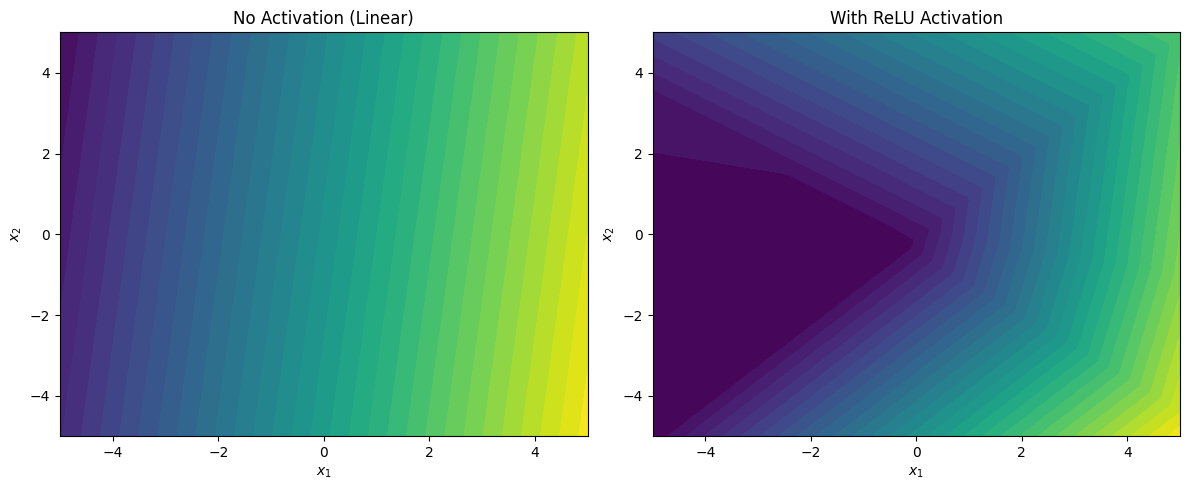

In [30]:
import matplotlib.pyplot as plt

# Create 2D grid of inputs
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_torch = torch.tensor(grid_points, dtype=torch.float32)

# Forward pass WITHOUT activation
z1_no_act = grid_torch @ W1_t + b1_t
y_hat_no_act = (z1_no_act @ W2_t + b2_t).reshape(xx.shape)

# Forward pass WITH ReLU
z1_relu = grid_torch @ W1_t + b1_t
h_relu = relu(z1_relu)
y_hat_relu = (h_relu @ W2_t + b2_t).reshape(xx.shape)

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear only (no activation)
#cs1 = axes[0].contourf(xx, yy, y_hat_no_act.detach().numpy(), levels=30, cmap='coolwarm')
cs1 = axes[0].contourf(xx, yy, y_hat_no_act.detach().numpy(), levels=30, cmap='viridis')
axes[0].set_title("No Activation (Linear)")
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')

# Non-linear with ReLU
#cs2 = axes[1].contourf(xx, yy, y_hat_relu.detach().numpy(), levels=30, cmap='coolwarm')
cs2 = axes[1].contourf(xx, yy, y_hat_relu.detach().numpy(), levels=30, cmap='viridis')
axes[1].set_title("With ReLU Activation")
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')

plt.tight_layout()
plt.show()

**What to Look For:**

- Do both plots show **straight lines** or **curves**?
- Which one creates more complex, flexible boundaries?
- Does ReLU allow the output to bend and fold space?

**Summary:**

| Setting             | Behavior                          |
|---------------------|-----------------------------------|
| No Activation       | Acts like a single linear model   |
| With ReLU (or Sigmoid) | Introduces bends and complexity |


> **This is why neural networks can learn non-linear patterns!**

➡️ In the final section, we’ll reflect on what this means for deeper models and real-world classification tasks.

---

### **7. Applying FNN Ideas to the Heart Dataset**

So far, we’ve worked with **toy synthetic data** to clearly visualize how hidden layers and activation functions transform input space.

But now, let’s **bridge these ideas to the real world** by applying them to a **subset of the Heart Disease dataset**.

**Our Goals in This Section:**

- Load and inspect a 2D slice of the heart dataset
- Visualize the class distribution
- Observe what makes real-world separation harder
- Appreciate the value of non-linear transformations in real data too

**Load and Prepare a 2D Subset**

We'll pick **two meaningful features**:

  - `thalach` → maximum heart rate achieved
  - `oldpeak` → ST depression induced by exercise

And we’ll define a **binary classification** task:

- Label `1` → heart disease present (`num > 0`)
- Label `0` → no heart disease (`num == 0`)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("heart.csv")

# Convert 'num' into binary: 0 = no disease, 1 = disease
df['target'] = (df['num'] > 0).astype(int)

# Select two features + target
#features = ['age', 'thalach']
features = ['thalach', 'oldpeak']
X_real = df[features].values
y_real = df['target'].values

# Normalize the features
# X_real = (X_real - X_real.mean(axis=0)) / X_real.std(axis=0)

# standardize the features
X_real = (X_real - np.min(X_real, axis=0)) / (np.max(X_real, axis=0) - np.min(X_real, axis=0))

**Heart Disease vs No Disease**

Let’s visualize how patients are distributed based on these two features.

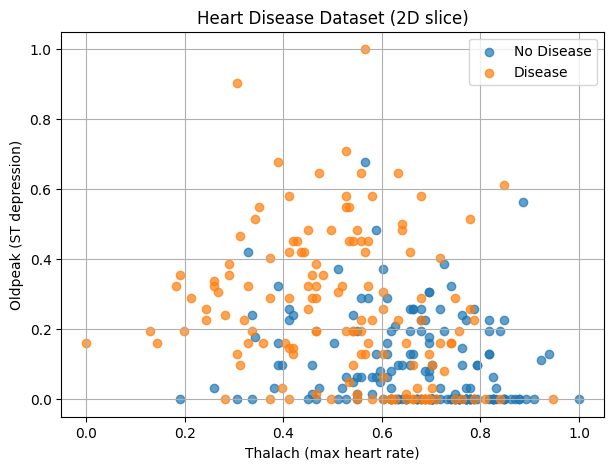

In [45]:
# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(X_real[y_real == 0][:, 0], X_real[y_real == 0][:, 1], label='No Disease', alpha=0.7)
plt.scatter(X_real[y_real == 1][:, 0], X_real[y_real == 1][:, 1], label='Disease', alpha=0.7)
plt.xlabel("Thalach (max heart rate)")
plt.ylabel("Oldpeak (ST depression)")
plt.title('Heart Disease Dataset (2D slice)')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**

- The two classes overlap quite a bit.
- The decision boundary **will not be linear** — we need **non-linear transformations**.

**(Optional) Try a Tiny FNN Forward Pass on This Data**

If you're curious, you can define a simple FNN as in Sections 2–4,  
initialize weights randomly, and observe the output `y_hat` on `X_real`.

We'll skip this for now since the next notebook will train actual FNNs on this dataset properly.

**What Did We Learn?**

- Real data is noisy, messy, and **not linearly separable**.
- FNNs with hidden layers and activations help us **learn non-linear decision surfaces**.
- The ideas from our toy experiments are **directly applicable** to real problems like heart disease prediction.


➡️ In the next notebook, we’ll manually implement **backpropagation** to train these networks —  
learning how gradients flow and parameters update to reduce prediction error.

---


### Let’s Apply a Tiny FNN on This Real Data

We’ll now pass the real dataset (age, thalach) through a small FNN —  using the same structure as before:

- 2 inputs → 3 hidden neurons → 1 output
- ReLU activation
- No training yet — just random weights

This helps us visualize the raw output surface (aka **logits**).


In [49]:
# Initialize weights (same as Section 2)
np.random.seed(42)
W1_real = np.random.randn(2, 3)    # (2 → 3)
b1_real = np.random.randn(1, 3)    # (1, 3)
W2_real = np.random.randn(3, 1)    # (3 → 1)
b2_real = np.random.randn(1, 1)    # (1, 1)

# ReLU function
def relu(z):
    return np.maximum(0, z)

# Forward pass (no training!)
z1 = np.dot(X_real, W1_real) + b1_real
h1 = relu(z1)
y_logits = np.dot(h1, W2_real) + b2_real


### **Visualize Output Logits**

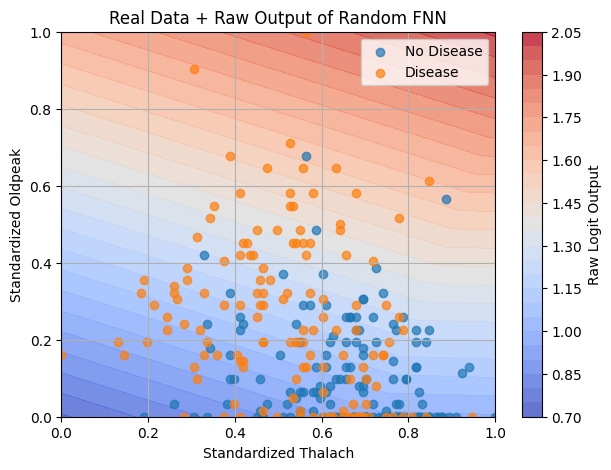

In [68]:
# Create a grid over standardized [0, 1] feature space
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Forward pass
z1_grid = np.dot(grid_points, W1_real) + b1_real
h1_grid = relu(z1_grid)
y_grid_logits = np.dot(h1_grid, W2_real) + b2_real
y_grid_logits = y_grid_logits.reshape(xx.shape)

# Plot
plt.figure(figsize=(7, 5))

# Contour plot of raw logits
contour = plt.contourf(xx, yy, y_grid_logits, cmap='coolwarm', alpha=0.8, levels=30)

# Decision surface with data points
plt.scatter(X_real[y_real == 0][:, 0], X_real[y_real == 0][:, 1], label='No Disease', alpha=0.7)
plt.scatter(X_real[y_real == 1][:, 0], X_real[y_real == 1][:, 1], label='Disease', alpha=0.7)

# Axes and labels
plt.xlabel('Standardized Thalach')
plt.ylabel('Standardized Oldpeak')
plt.title('Real Data + Raw Output of Random FNN')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

# Explicit colorbar linked to contour plot
plt.colorbar(contour, label="Raw Logit Output")
plt.show()



**🔍 What is a Logit?**

In binary classification, the output of the neural network (before applying the sigmoid function) is called the **logit**.

Even though we use ReLU in the hidden layer, the **final output** of the network is just a single number — the logit.

This is the value we use to compute the probability:

$$
\text{Probability} = \text{sigmoid}(\text{logit}) = \frac{1}{1 + e^{-\text{logit}}}
$$

We plot the **raw logit values** in the plot above to understand how the network’s output varies across the input space. The predicted **logits** are visualized as colors across a 2D input grid, helping us see **how confident** the model is about its decision across different regions.

**What This Shows:**

- Even without training, the **shape** of the decision surface is **non-linear**.
- The hidden layer **reshapes the input space**, making flexible prediction possible.
- Once we train the model, this surface will better match the true labels.

➡️ In the next notebook, we’ll implement **backpropagation** to learn how to actually **train** this FNN to reduce classification errors.

### Visualize Predicted Probabilities (After Sigmoid)

Let’s now apply the **sigmoid function** to the raw outputs (ie. **logits**) to convert them into probabilities of disease.

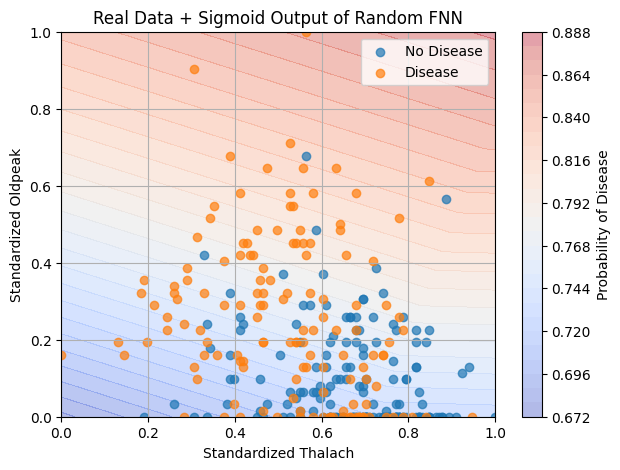

In [69]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Apply sigmoid to logits
y_grid_probs = sigmoid(y_grid_logits)

# Plot
plt.figure(figsize=(7, 5))
contour = plt.contourf(xx, yy, y_grid_probs, cmap='coolwarm', alpha=0.4, levels=30)
plt.contour(xx, yy, y_grid_probs, levels=[0.5], colors='black', linestyles='--')  # Decision boundary

# Scatter original data
plt.scatter(X_real[y_real == 0][:, 0], X_real[y_real == 0][:, 1], label='No Disease', alpha=0.7)
plt.scatter(X_real[y_real == 1][:, 0], X_real[y_real == 1][:, 1], label='Disease', alpha=0.7)

# Labels and formatting
plt.xlabel('Standardized Thalach')
plt.ylabel('Standardized Oldpeak')
plt.title('Real Data + Sigmoid Output of Random FNN')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.colorbar(contour, label="Probability of Disease")  # <- attach explicitly
plt.show()



**What to Observe:**

- This plot shows the network’s **confidence** — red means “likely disease”, blue means “likely no disease”.
- Since the network is **untrained**, the probabilities are random — but already **non-linear** thanks to the FNN structure.
- Training will adjust weights to match these probabilities with the true labels.

➡️ This sets the stage perfectly for the next notebook, where we’ll implement **backpropagation** to train the network and minimize classification error.
